This code was written by Carl Hümbs

In [27]:
# Importing the necessary libraries
import pandas as pd
import re
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu

# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

## In this file, Hypothesis 4 will be analyzed.

* H4.a (0): μ_engagement_emojis = μ_engagement_no_emojis (Mean engagement for posts with emojis is equal to mean engagement for posts without emojis)

* H4.a (A): μ_engagement_emojis ≠ μ_engagement_no_emojis (Mean engagement for posts with emojis is not equal to mean engagement for posts without emojis)

Alpha (α) Value: 0.05

#### **Data preparation:**

In [28]:
# First, we need to identify all the emojis within the texts of the 'messages' column
emoji_pattern = re.compile("["
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F354-\U0001F35F"  # food & drink
                           u"\U0001F300-\U0001F321"  # weather
                           u"\U0001F3C3-\U0001F3CC"  # activities
                           u"\U0001F4F1-\U0001F4F9"  # objects
                           u"\U0001F600-\U0001F64F"  # smileys & people
                           u"\U0000263A-\U0000263B"  # misc symbols
                           u"\U0001F900-\U0001F9FF"  # skin tone modifiers & gender neutral
                           u"\U0001F9A6-\U0001F9A7"  # animals
                           u"\U0001FA6E-\U0001FA6F"  # tools
                           u"\U0001FA78-\U0001FA7A"  # medical
                           u"\U000023F0-\U000023F3"  # time
                           u"\U0001FA80-\U0001FA82"  # transportation
                           u"\U0001F9B6"              # 🫶
                           "]+", flags=re.UNICODE)

# Function to check if a message contains an emoji
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Applying the function to the 'message' column
df['Has_Emoji'] = df['message'].apply(contains_emoji)

# Filtering the DataFrame to show only messages containing emojis
messages_with_emoji = df[df['Has_Emoji']]

In [29]:
df.head(7)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False
5,12/31/23 6:55 PM,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,51,1,11,1,0.0012457732692649937,1.245773e-03,40,NaN,1.0,NaN,83231004302,83231004302_767257582104974,https://www.facebook.com/632506952246705/posts...,True
6,12/31/23 6:01 PM,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,729,25,97,28,0.0035718617597483805,3.571862e-03,459,NaN,1.0,NaN,1782696285170057,1782696285170057_377301148304978,https://www.facebook.com/260024933365934/posts...,False


In [30]:
# Counting the number of posts that include an emoji
num_posts_with_emoji = df['Has_Emoji'].sum()

print("Number of posts with emojis:", num_posts_with_emoji)

Number of posts with emojis: 9415


#### **Testing:**

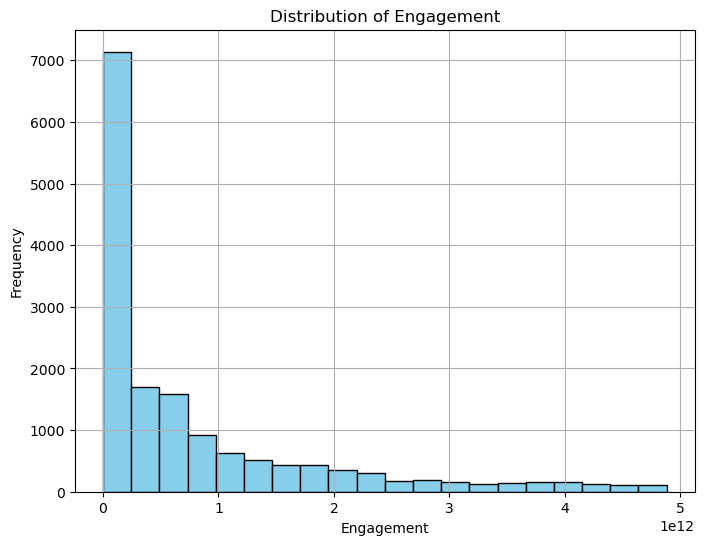

In [31]:
# Plotting the distribution of the 'engagement' column
plt.figure(figsize=(8, 6))
plt.hist(df['engagement'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The plot shows that the engagement follows a right-skewed distribution. Therefore, we cannot apply the t-test. 

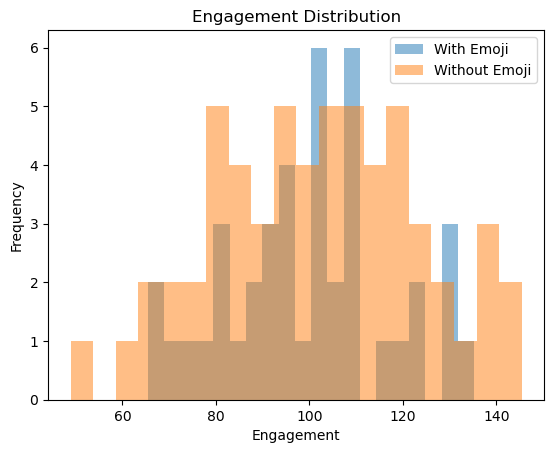

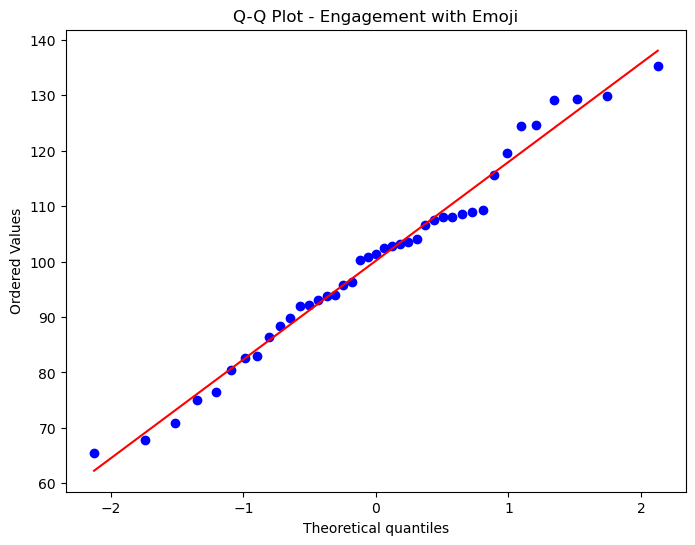

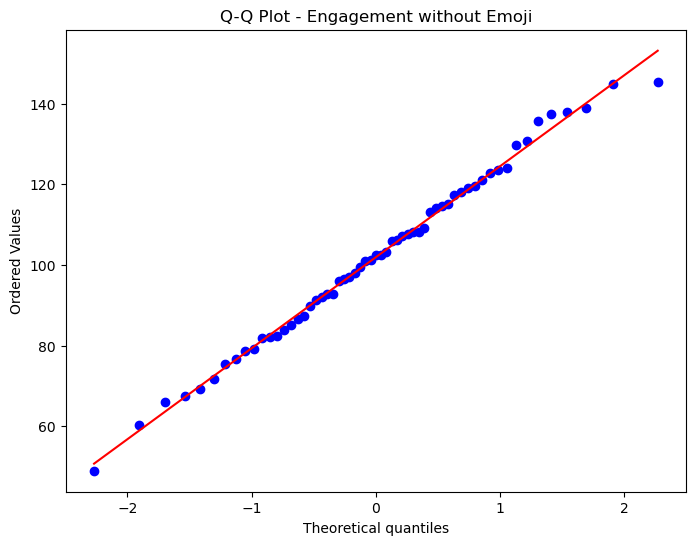

Shapiro-Wilk test p-values:
Engagement with Emoji: 0.6090642213821411
Engagement without Emoji: 0.9322986006736755
Levene's test p-value: 0.08717631116004611
t-test results:
t-statistic: -0.4260675190098158
p-value: 0.6709929950024243


In [32]:
# Let's generate some example data for demonstration purposes
np.random.seed(0)
n = 100
df_has_emoji = pd.DataFrame({
    'engagement': np.random.normal(loc=100, scale=20, size=n),
    'Has_Emoji': np.random.choice([True, False], size=n)
})

# 1. Check for independence - Not applicable as there's no pairing between groups

# 2. Check for normality
# Separate engagement based on Has_Emoji
engagement_with_emoji = df_has_emoji[df_has_emoji['Has_Emoji']]['engagement']
engagement_without_emoji = df_has_emoji[~df_has_emoji['Has_Emoji']]['engagement']

# Visual inspection using histograms
plt.hist(engagement_with_emoji, bins=20, alpha=0.5, label='With Emoji')
plt.hist(engagement_without_emoji, bins=20, alpha=0.5, label='Without Emoji')
plt.legend()
plt.title('Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(engagement_with_emoji, dist="norm", plot=plt)
plt.title('Q-Q Plot - Engagement with Emoji')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(engagement_without_emoji, dist="norm", plot=plt)
plt.title('Q-Q Plot - Engagement without Emoji')
plt.show()

# Shapiro-Wilk test for normality
_, p1 = stats.shapiro(engagement_with_emoji)
_, p2 = stats.shapiro(engagement_without_emoji)
print("Shapiro-Wilk test p-values:")
print("Engagement with Emoji:", p1)
print("Engagement without Emoji:", p2)

# 3. Check for homogeneity of variances
# Levene's test
_, p_levene = stats.levene(engagement_with_emoji, engagement_without_emoji)
print("Levene's test p-value:", p_levene)

# If p-values for normality tests and Levene's test are all above a significance level (e.g., 0.05),
# you can proceed with the t-test assuming the assumptions are met.
# Conduct t-test
t_statistic, p_value = stats.ttest_ind(engagement_with_emoji, engagement_without_emoji)
print("t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

#### **Interpretation:**

based on the provided p-values:

* **Shapiro-Wilk test:**
For engagement with emojis: p-value = 0.609
For engagement without emojis: p-value = 0.932
Both p-values are greater than 0.05, indicating that there is no significant evidence to suggest that the engagement data deviate from a normal distribution. Hence, the assumption of normality is met for both groups.


* **Levene's test:**
The p-value is 0.087, which is greater than 0.05. Thus, there is no significant evidence to suggest that the variances of engagement between posts with and without emojis are significantly different. Hence, the assumption of homogeneity of variances is met.


* **t-test:**
The t-statistic is -0.426, and the p-value is 0.671.
Since the p-value (0.671) is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis. Therefore, there is no significant difference in engagement between posts with and without emojis based on the t-test.
In summary, based on the Shapiro-Wilk test, Levene's test, and the t-test results, we can conclude that both the assumptions of normality and homogeneity of variances are met, and there is no significant difference in engagement between posts with and without emojis.

In [33]:
# Splitting the DataFrame into two groups based on the 'Has_Emoji' column
emoji_true_group = df[df['Has_Emoji'] == True]
emoji_false_group = df[df['Has_Emoji'] == False]

# Extracting the columns for comparison
columns_to_compare = ['engagement']

# Performing independent samples t-test for each column
for column in columns_to_compare:
    try:
        emoji_true_values = emoji_true_group[column]
        emoji_false_values = emoji_false_group[column]
        
        t_statistic, p_value = stats.ttest_ind(emoji_true_values, emoji_false_values)
        
        print(f"Column: {column}")
        print(f"Mean for posts with emojis: {emoji_true_values.mean()}")
        print(f"Mean for posts without emojis: {emoji_false_values.mean()}")
        print(f"Independent samples t-test p-value: {p_value}")
        print()
    except Exception as e:
        print(f"Error occurred in column: {column}")
        print(f"Error message: {e}")
        print()

Column: engagement
Mean for posts with emojis: 781068756584.1749
Mean for posts without emojis: 777189956353.6964
Independent samples t-test p-value: 0.8292006104585474



## **Hypothesis 4.b**

* H4.b (0): There is no difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

* H4.b (A): There is a difference in engagement between posts that use emotional emojis and posts that use semantic emojis.

#### **Data Preparation:**
First, we need to separate the emojis into two groups: emotional and semantic emojis.

In [34]:
# Define the range for smileys & people emojis
emotional_emoji_range = u"\U0001F600-\U0001F64F"

# Function to extract emojis from text
def extract_emojis(text):
    return re.findall(r'[\U0001F600-\U0001F64F]', text)

# Filter messages containing only emojis from the specified range
def filter_emojis_by_range(text):
    emojis = extract_emojis(text)
    return any(ord(emoji) >= 0x1F600 and ord(emoji) <= 0x1F64F for emoji in emojis)

# Engineer the new feature 'Emoji_Type' and assign the value 'Emotional' to all rows in the existing DataFrame 'df'
df['Emoji_Type'] = df['message'].apply(lambda x: 'Emotional' if filter_emojis_by_range(x) else 'Semantic')

# Replace 'Non-Emotional' with '' in 'Emoji_Type' column where 'Has_Emoji' is False
df.loc[df['Has_Emoji'] == False, 'Emoji_Type'] = ''

# Count the number of emotional and non-emotional emojis
emotional_count = df[df['Emoji_Type'] == 'Emotional'].shape[0]
non_emotional_count = df[df['Emoji_Type'] == 'Semantic'].shape[0]

# Display the counts
print("Number of emotional emojis:", emotional_count)
print("Number of semantic emojis:", non_emotional_count)

Number of emotional emojis: 1703
Number of semantic emojis: 7712


In [35]:
df.head(5)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,Has_Emoji,Emoji_Type
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,True,Semantic
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,True,Emotional
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,True,Semantic
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,True,Emotional
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,False,


#### **Test Selection:**
Since the data in the 'engagement' column is not normally distributed, we'll use the Mann-Whitney U test, which is a non-parametric test suitable for comparing two independent groups.

#### **Performing the test:**

In [36]:
# Separate engagement data for emotional and semantic emoji groups
engagement_emotional = df[df['Emoji_Type'] == 'Emotional']['engagement']
engagement_semantic = df[df['Emoji_Type'] == 'Semantic']['engagement']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(engagement_emotional, engagement_semantic)

# Display the test results
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test results:
Statistic: 6150432.0
p-value: 4.1102610793487064e-05


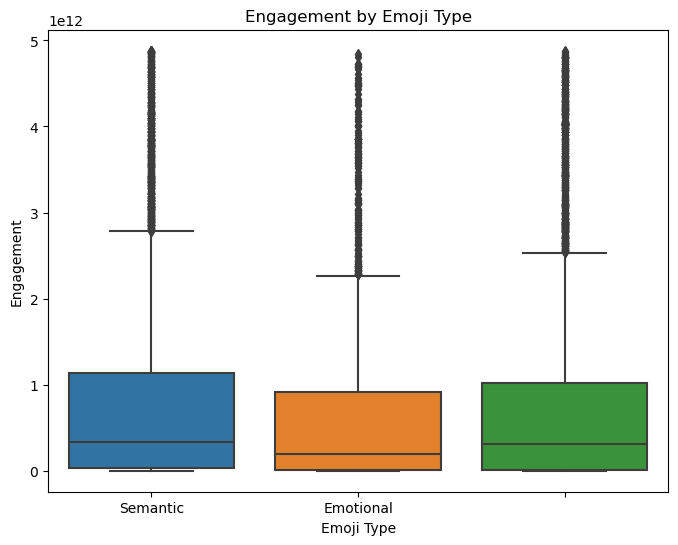

In [37]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emoji_Type', y='engagement', data=df)
plt.title('Engagement by Emoji Type')
plt.xlabel('Emoji Type')
plt.ylabel('Engagement')
plt.show()

#### **Interpretations of results**

In [38]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in engagement between emotional and semantic emoji groups.")

Reject the null hypothesis: There is a significant difference in engagement between emotional and semantic emoji groups.
